In [7]:
import matplotlib.pyplot as plt
import numpy as np
from bintrees import BinaryTree
from tqdm.notebook import tqdm_notebook
import pickle

from common import VoterData
from solver import option2_find_f, F_ERROR, MAX_F, MIN_F
from elicit import Option2Elicit, get_random_dv, get_random_hs, HOUSE_REP_TO_POP

In [2]:
np.random.seed(7)

In [3]:
ns = 5
total = 0

# stores upper bound : sample
bounds_upper = BinaryTree()

pbar = tqdm_notebook(total=100)
while total != 1000:
    stop = []
    stoh = []
    stodv = []
    for _ in range(ns):
        dv = get_random_dv()
        hs = get_random_hs()
        stodv.append(dv)
        stoh.append(hs)
        stop.append(hs * HOUSE_REP_TO_POP)
    vd = VoterData(ns, stop, stoh, stodv)
    vd_id = total
    
    # both responses should be valid
    f1, err1 = option2_find_f(vd, True)
    f2, err2 = option2_find_f(vd, False)
    if err1 != F_ERROR.none or err2 != F_ERROR.none:
        continue
    assert ((abs(f1.f_hi - f2.f_lo) < 1e-3) or (abs(f1.f_lo - f2.f_hi) < 1e-3))
        
    if f1.f_hi not in bounds_upper:
        bounds_upper.insert(f1.f_hi, vd)
        pbar.update(1)
        total += 1

pbar.close()

In [4]:
ret = bounds_upper.keys()

In [5]:
v = [i for i in ret]

(array([122., 114., 122.,  95., 102.,  98.,  81.,  82.,  88.,  96.]),
 array([0.0077706 , 0.40699354, 0.80621648, 1.20543942, 1.60466236,
        2.0038853 , 2.40310824, 2.80233118, 3.20155412, 3.60077706,
        4.        ]),
 <a list of 10 Patch objects>)

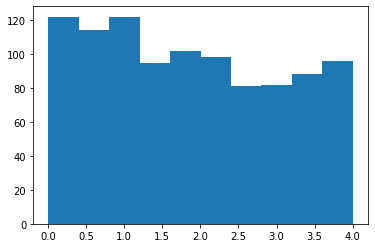

In [6]:
plt.hist(v)

In [9]:
f = open('ns=5.pkl', 'wb')
pickle.dump(bounds_upper, f)
f.close()

In [10]:
f = open('ns=5.pkl', 'rb')
bu = pickle.load(f)
f.close()